### DATA EXPLORATION

#### Loading the libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# we want our plots to apear within notebooks
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_style("darkgrid")
sns.set(rc = {'figure.figsize':(15,8)})

#### Load dataset into the DataFrame

In [3]:
df = pd.read_csv("fraud_oracle.csv")
df.head()

,MonthOfAccident,WeekOfMonthOfAccident,DayOfWeekOfAccident,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeRangeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,NaN,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,NaN,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,NaN,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,NaN,no change,1 vehicle,1994,Collision


#### Checking datatype

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MonthOfAccident         15420 non-null  object 
 1   WeekOfMonthOfAccident   15420 non-null  int64  
 2   DayOfWeekOfAccident     15420 non-null  object 
 3   Make                    15420 non-null  object 
 4   AccidentArea            15420 non-null  object 
 5   DayOfWeekClaimed        15419 non-null  object 
 6   MonthClaimed            15419 non-null  object 
 7   WeekOfMonthClaimed      15420 non-null  int64  
 8   Sex                     15420 non-null  object 
 9   MaritalStatus           15420 non-null  object 
 10  AgeOfPolicyHolder       15100 non-null  float64
 11  Fault                   15420 non-null  object 
 12  PolicyType              15420 non-null  object 
 13  VehicleCategory         15420 non-null  object 
 14  VehiclePriceRange       15420 non-null

#### check the dimensions 

In [5]:
df.shape

(15420, 33)

#### check the columns

In [6]:
df.columns

Index(['MonthOfAccident', 'WeekOfMonthOfAccident', 'DayOfWeekOfAccident',
       'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed',
       'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'AgeOfPolicyHolder',
       'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePriceRange',
       'FraudFound_P', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeRangeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

#### Provide descriptive statistics

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonthOfAccident,15420.00,2.79,1.29,1.00,2.00,3.00,4.00,5.00
WeekOfMonthClaimed,15420.00,2.69,1.26,1.00,2.00,3.00,4.00,5.00
AgeOfPolicyHolder,15100.00,40.70,12.31,16.00,31.00,39.00,49.00,80.00
FraudFound_P,15420.00,0.06,0.24,0.00,0.00,0.00,0.00,1.00
PolicyNumber,15420.00,7710.50,4451.51,1.00,3855.75,7710.50,11565.25,15420.00
RepNumber,15420.00,8.48,4.60,1.00,5.00,8.00,12.00,16.00
Deductible,15420.00,407.70,43.95,300.00,400.00,400.00,400.00,700.00
DriverRating,15420.00,2.49,1.12,1.00,1.00,2.00,3.00,4.00
Year,15420.00,1994.87,0.80,1994.00,1994.00,1995.00,1996.00,1996.00


#### Count of columns with specific data types

Text(0, 0.5, 'Data type')

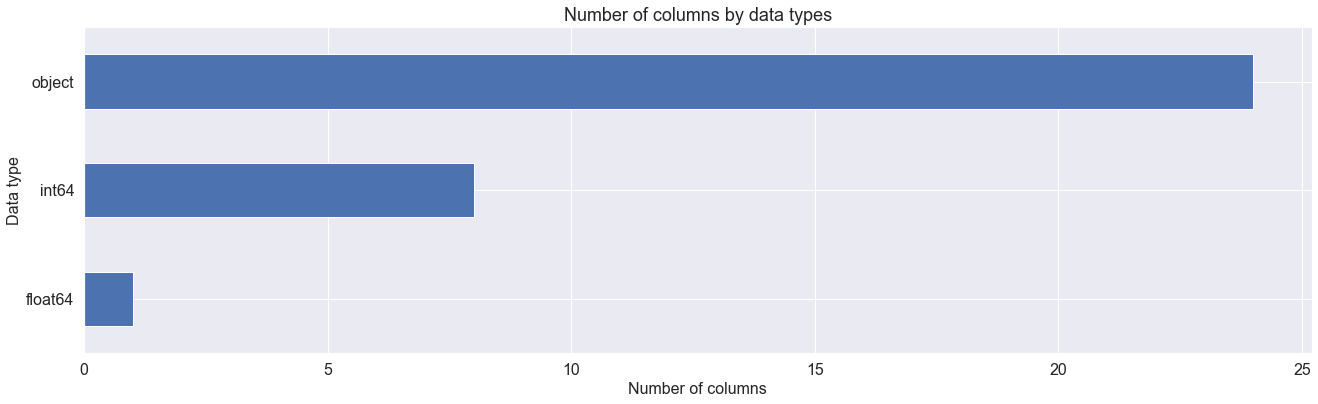

In [8]:
# Number of each type of column
df.dtypes.value_counts().sort_values().plot(kind='barh',
                                            figsize=(22, 6),
                                            fontsize=16)

plt.title('Number of columns by data types', fontsize=18)
plt.xlabel('Number of columns', fontsize=16)
plt.ylabel('Data type', fontsize=16)

#### Identify categorical columns and thier number of categories 

In [42]:
cat_col = [col for col in df.columns if df[col].dtypes == "O"]
cat_col
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

Month                   12
DayOfWeek                7
Make                    19
AccidentArea             2
DayOfWeekClaimed         8
MonthClaimed            13
Sex                      2
MaritalStatus            4
Fault                    2
PolicyType               9
VehicleCategory          3
VehiclePrice             6
Days_Policy_Accident     5
Days_Policy_Claim        4
PastNumberOfClaims       4
AgeOfVehicle             8
AgeOfPolicyHolder        9
PoliceReportFiled        2
WitnessPresent           2
AgentType                2
NumberOfSuppliments      4
AddressChange_Claim      5
NumberOfCars             5
BasePolicy               3
dtype: int64

#### Check for missing values 

In [137]:
df.isnull().sum().sort_values(ascending = False)

NumberOfSuppliments       7047
PastNumberOfClaims        4352
AgeOfPolicyHolder          320
Days_Policy_Accident        55
Days_Policy_Claim            1
DayOfWeekClaimed             1
MonthClaimed                 1
MonthOfAccident              0
PoliceReportFiled            0
AgeOfVehicle                 0
AgeRangeOfPolicyHolder       0
WitnessPresent               0
Deductible                   0
AgentType                    0
AddressChange_Claim          0
NumberOfCars                 0
Year                         0
DriverRating                 0
PolicyNumber                 0
RepNumber                    0
WeekOfMonthOfAccident        0
FraudFound_P                 0
VehiclePriceRange            0
VehicleCategory              0
PolicyType                   0
Fault                        0
MaritalStatus                0
Sex                          0
WeekOfMonthClaimed           0
AccidentArea                 0
Make                         0
DayOfWeekOfAccident          0
BasePoli

In [49]:
def missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    print("Dataframe has " + str(df.shape[1]) + " columns.")
    print("There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    return mis_val_table_ren_columns

In [50]:
# Missing values statistics
miss_values = missing_values(df)
miss_values.head(20)

Dataframe has 33 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
NumberOfSuppliments,7047,45.70
PastNumberOfClaims,4352,28.20
AgeOfPolicyHolder,320,2.10
Days_Policy_Accident,55,0.40
DayOfWeekClaimed,1,0.00
MonthClaimed,1,0.00
Days_Policy_Claim,1,0.00


#### Visualzing missing values 

In [138]:
! pip install missingno

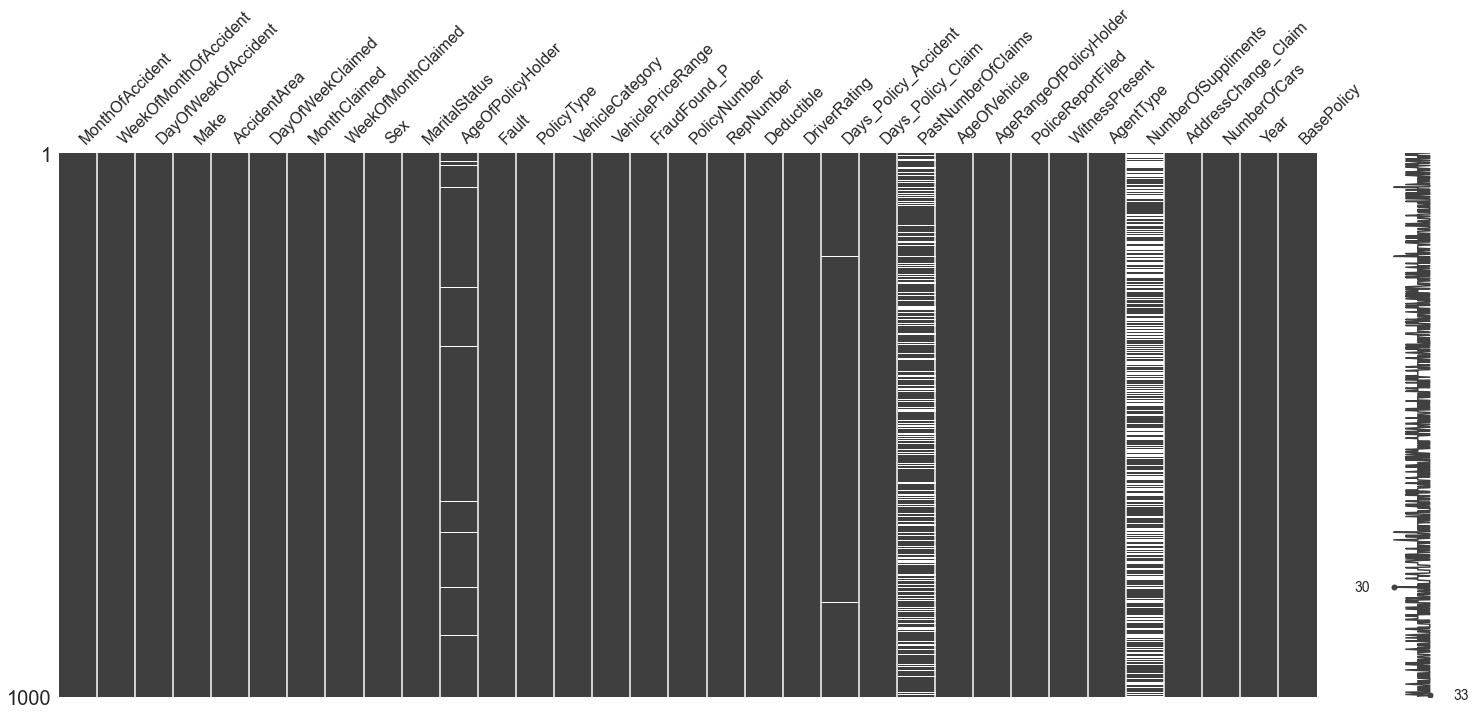

In [54]:
#nullity matrix
import missingno as msno
ax = msno.matrix(df.sample(1000))

<AxesSubplot:>

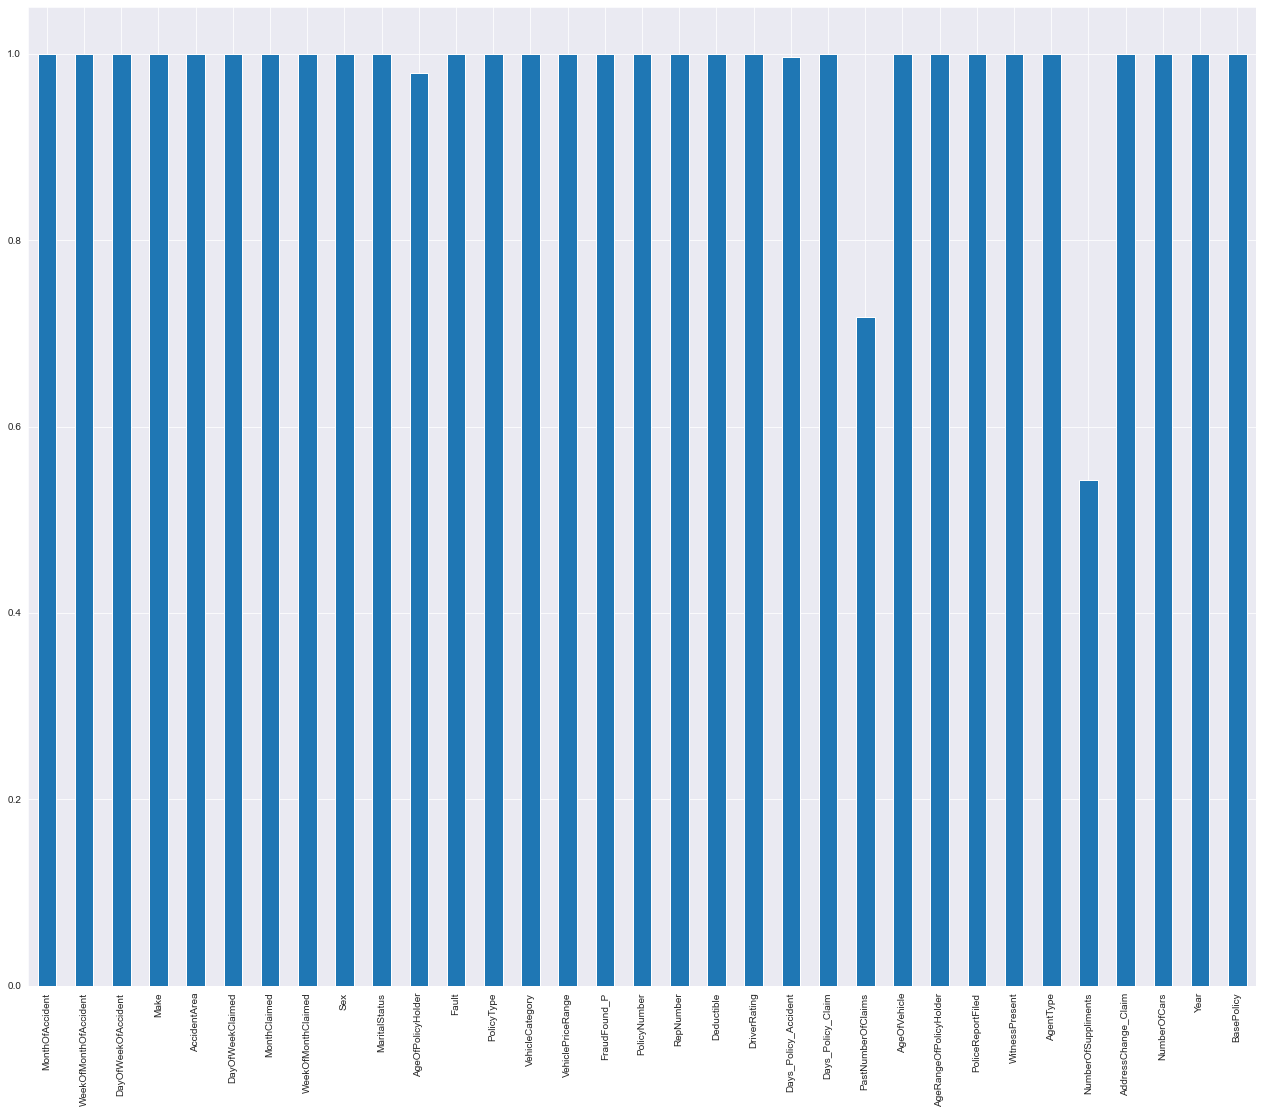

In [55]:
fig, ax = plt.subplots(figsize=(22, 18))
(1 - df.isnull().mean()).abs().plot.bar(ax=ax)

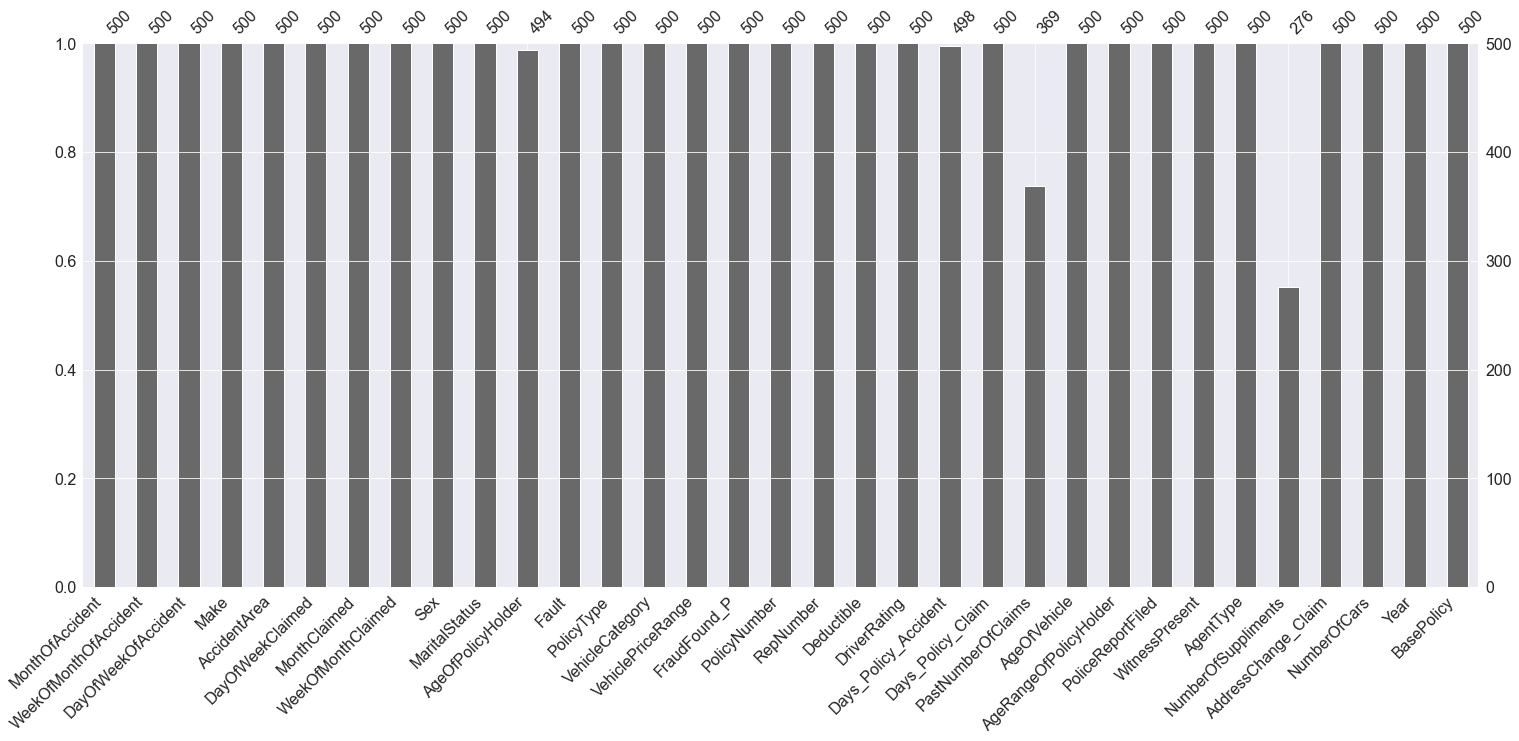

In [57]:
ax = msno.bar(df.sample(500))

#### Missingno correlation heatmap

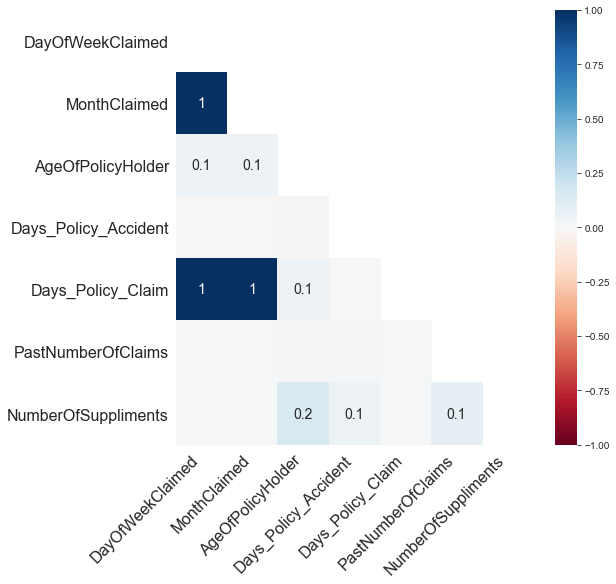

In [60]:
#nullity correaltion
ax = msno.heatmap(df, figsize=(8, 8))

#### Dendogram

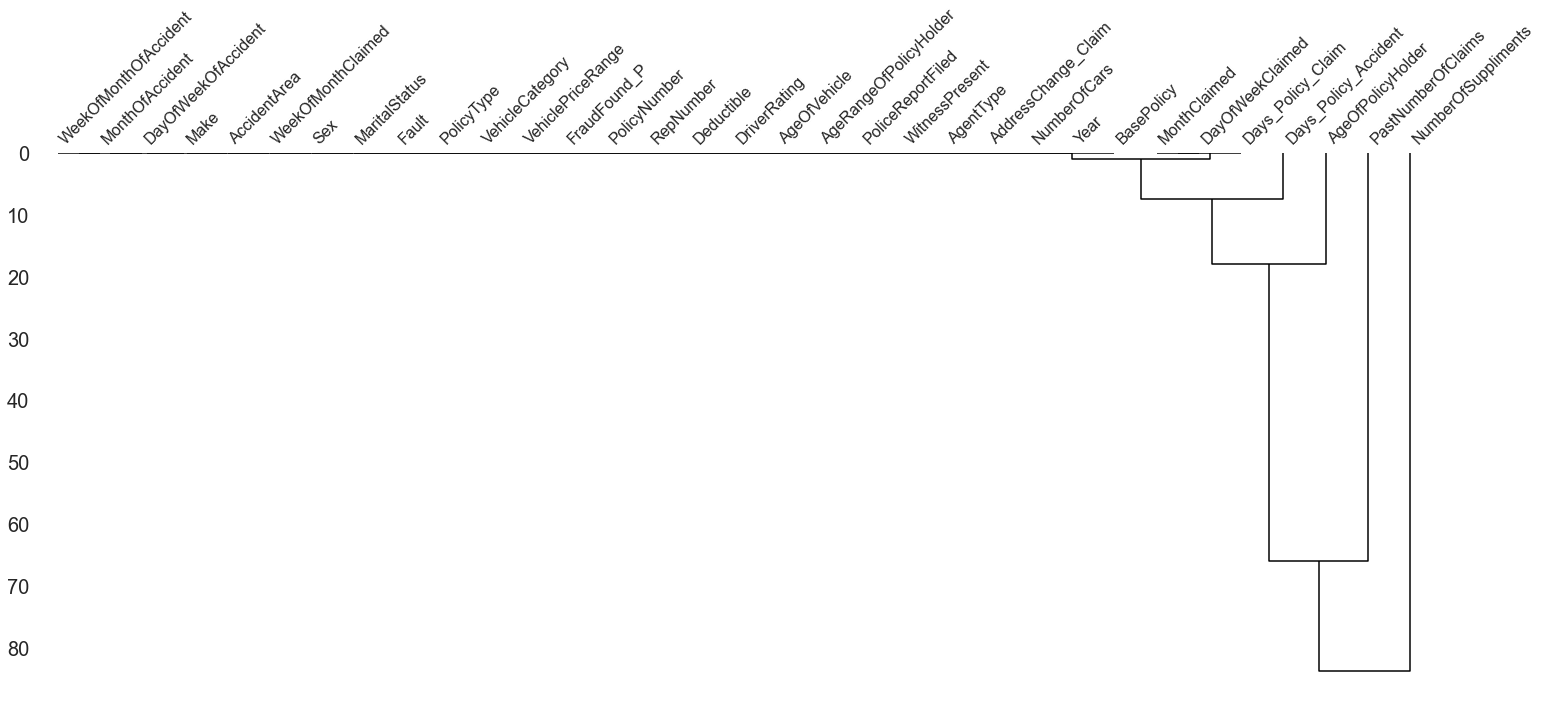

In [61]:
ax = msno.dendrogram(df)

#### Analyzing the target 

In [63]:
df['FraudFound_P'].unique()

array([0, 1])

0    14497
1      923
Name: FraudFound_P, dtype: int64


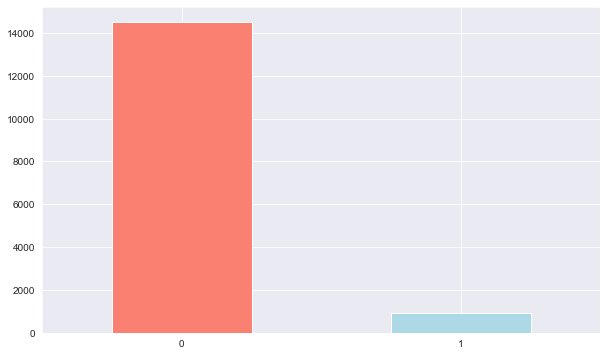

In [31]:
#visualize the number of frauds
print(df["FraudFound_P"].value_counts())
plt.figure(figsize=(10,6))
df["FraudFound_P"].value_counts().plot(kind="bar", color=['salmon', 'lightblue'])
plt.xticks(rotation = 0);

#### visualize whose fault it is 

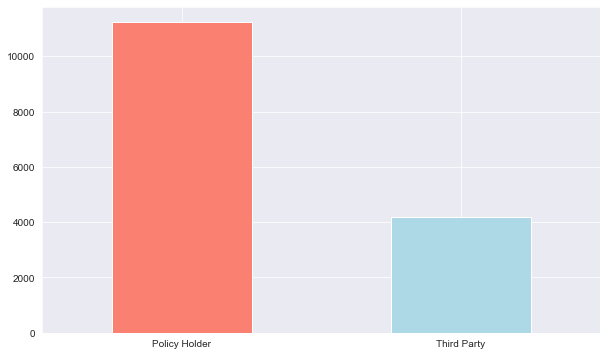

In [32]:
(df["Fault"].value_counts())
plt.figure(figsize=(10,6))
df["Fault"].value_counts().plot(kind="bar",color=['salmon', 'lightblue'])
plt.xticks(rotation = 0);


##### Visualize the AccidentArea

Urban    13822
Rural     1598
Name: AccidentArea, dtype: int64


(array([0, 1]), [Text(0, 0, 'Urban'), Text(1, 0, 'Rural')])

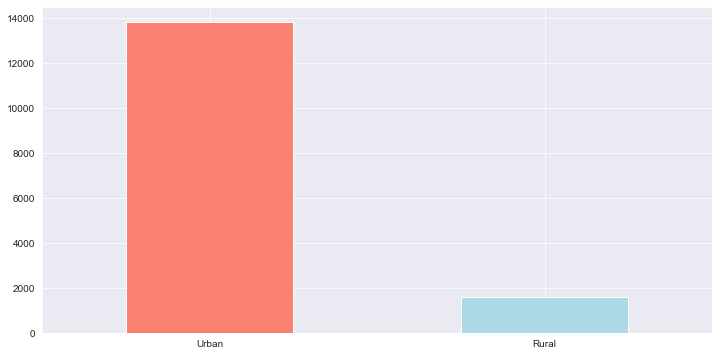

In [33]:

print(df.AccidentArea.value_counts())
plt.figure(figsize=(12,6))
df.AccidentArea.value_counts().plot(kind="bar",color=["salmon","lightblue"])
plt.xticks(rotation=0)


#### Finding out the vehicle category invloved 

(array([0, 1, 2]),
 [Text(0, 0, 'Sedan'), Text(1, 0, 'Sport'), Text(2, 0, 'Utility')])

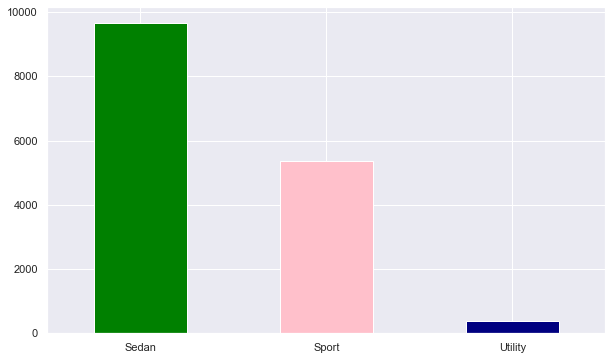

In [9]:
plt.figure(figsize=(10,6))
df.VehicleCategory.value_counts().plot(kind="bar",color=["green","pink","navy"])
plt.xticks(rotation=0)

#### Visualize the age of Vehicle

7 years        5807
more than 7    3981
6 years        3448
5 years        1357
new             373
4 years         229
3 years         152
2 years          73
Name: AgeOfVehicle, dtype: int64


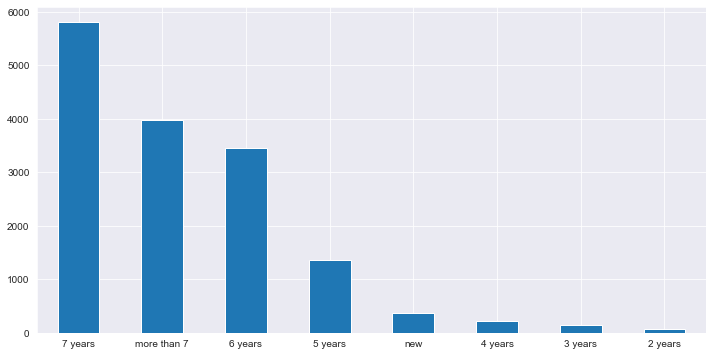

In [36]:
print(df.AgeOfVehicle.value_counts())
plt.figure(figsize=(12,6))
df.AgeOfVehicle.value_counts().plot(kind="bar")
plt.xticks(rotation=0);

#### Most fraud occured in which year 

In [11]:
df_year_count = df.loc[df['FraudFound_P']==1]['Year'].value_counts().rename_axis('year').reset_index(name='counts')


<AxesSubplot:xlabel='year', ylabel='counts'>

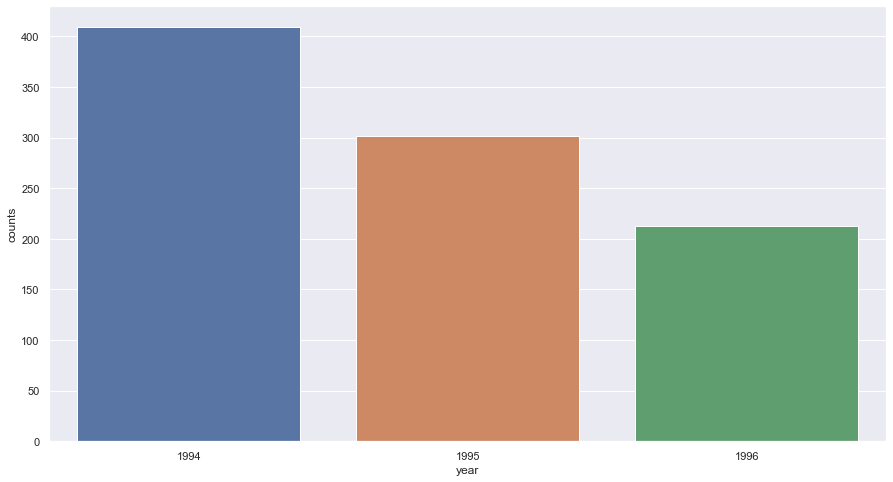

In [12]:
sns.barplot(x=df_year_count['year'], y=df_year_count['counts'])

#### Analyzing the age of the policy holder 

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['PolicyNumber'], df['Year'])
ax.set_xlabel('PolicyNumber')
ax.set_ylabel('Year')
plt.show()

In [90]:
df.AgeOfPolicyHolder

0       27.00
1       34.00
2       47.00
3       65.00
4       27.00
         ... 
15415   35.00
15416   30.00
15417   24.00
15418   34.00
15419   21.00
Name: AgeOfPolicyHolder, Length: 15420, dtype: float64

In [83]:
df.AgeOfVehicle.unique()

array(['3 years', '6 years', '7 years', 'more than 7', '5 years', 'new',
       '4 years', '2 years'], dtype=object)

<AxesSubplot:ylabel='AgeOfPolicyHolder'>

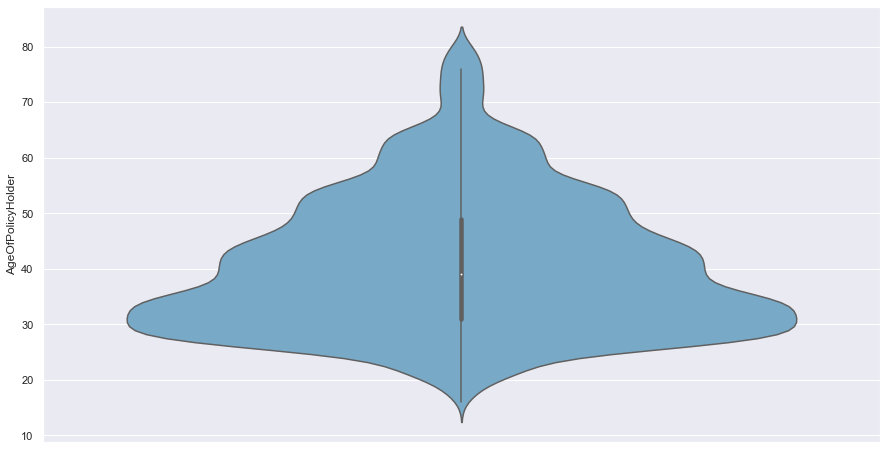

In [111]:
sns.violinplot(data=df[df.AgeOfPolicyHolder < 100], y = 'AgeOfPolicyHolder', palette='Blues')

#### Visualzing total number of female and male holders based on their age 

In [114]:
df.groupby('Sex')['AgeOfPolicyHolder'].value_counts()

Sex     AgeOfPolicyHolder
Female  35.00                124
        27.00                119
        34.00                119
        31.00                118
        32.00                118
                            ... 
Male    70.00                 25
        20.00                 24
        79.00                 17
        16.00                  8
        17.00                  6
Name: AgeOfPolicyHolder, Length: 129, dtype: int64

<AxesSubplot:xlabel='AgeOfPolicyHolder', ylabel='Count'>

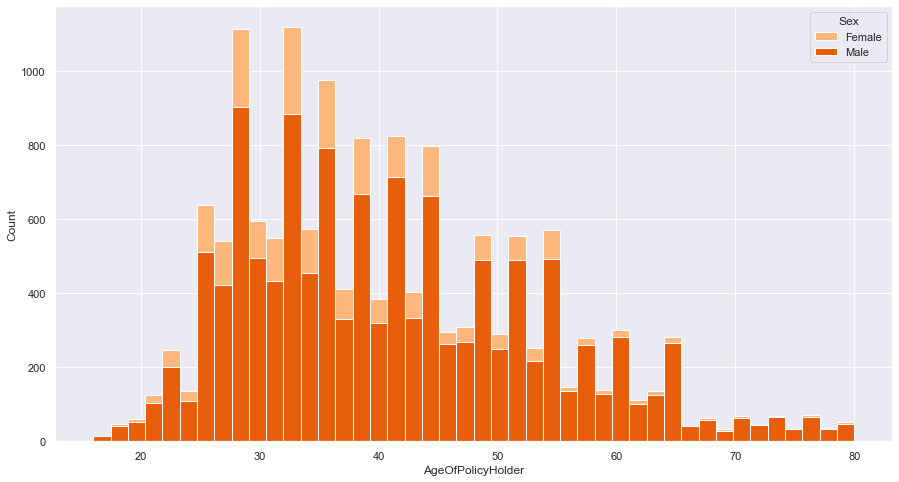

In [115]:
sns.histplot(df, hue = 'Sex', x = 'AgeOfPolicyHolder', palette='Oranges', multiple = 'stack' , alpha = 1)

#### Understanding the vehicle type that was mostly invloved in the fradulent claims 

<AxesSubplot:xlabel='Make', ylabel='Count'>

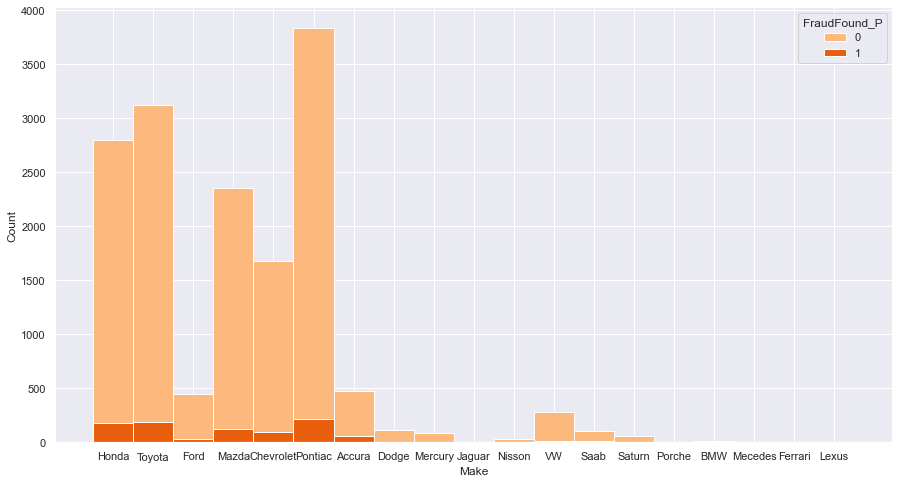

In [116]:
sns.histplot(df, hue = 'FraudFound_P', x = 'Make', palette='Oranges', multiple = 'stack' , alpha = 1)

#### Anazlying the relation between rating and age of the policy holder (we see that the age of the person doesn't have a great influnece towards his driving calibre)

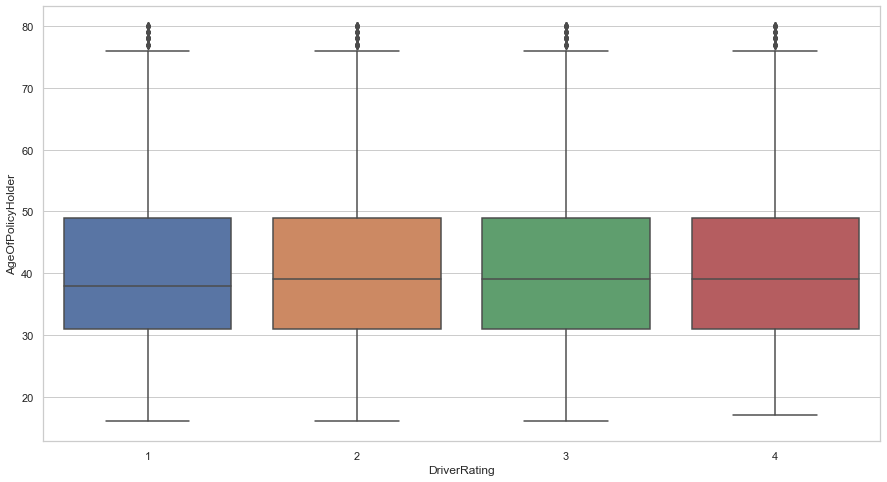

In [152]:
# sns.histplot(df, hue = 'DriverRating', x = 'AgeOfPolicyHolder', multiple = 'stack' ,  stat='count')
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(data=df, x=df["DriverRating"], y=df["AgeOfPolicyHolder"])

#### Visualzing the relation between age and make of the vehicle 

<AxesSubplot:xlabel='AgeOfVehicle', ylabel='Count'>

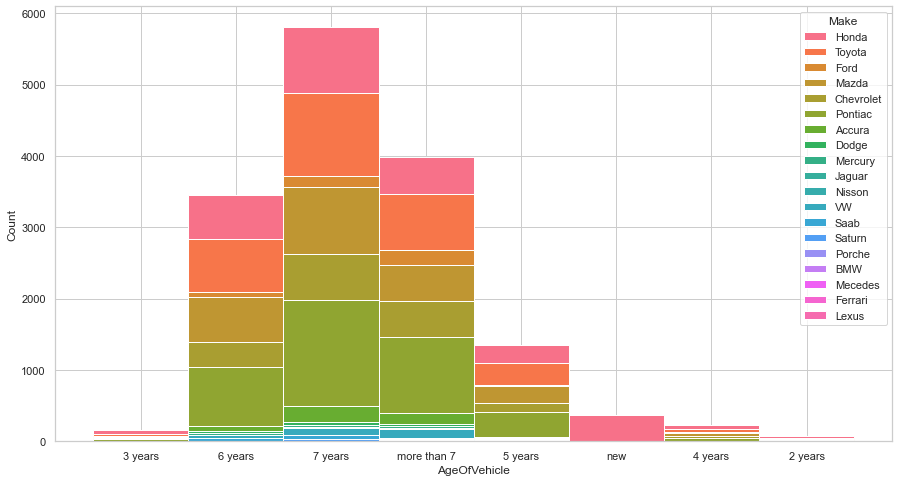

In [178]:
sns.histplot(df, hue = 'Make', x = 'AgeOfVehicle', multiple = 'stack' , alpha = 1)

#### Relation between age of the holder and number of cars owned 

<AxesSubplot:xlabel='AgeOfPolicyHolder', ylabel='Count'>

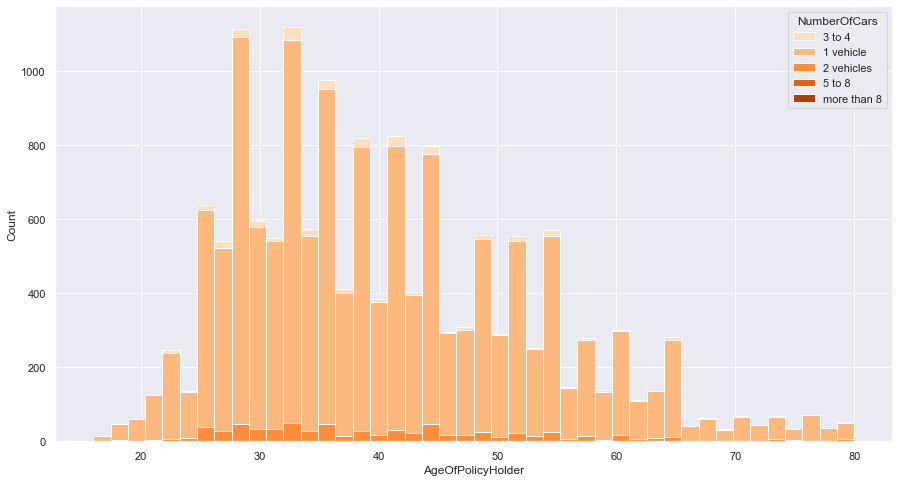

In [120]:
sns.histplot(df, hue = 'NumberOfCars', x = 'AgeOfPolicyHolder', palette='Oranges', multiple = 'stack' , alpha = 1)

#### Realizing which policy type has been mostly used in frodulent claims 

<AxesSubplot:xlabel='PolicyType', ylabel='Count'>

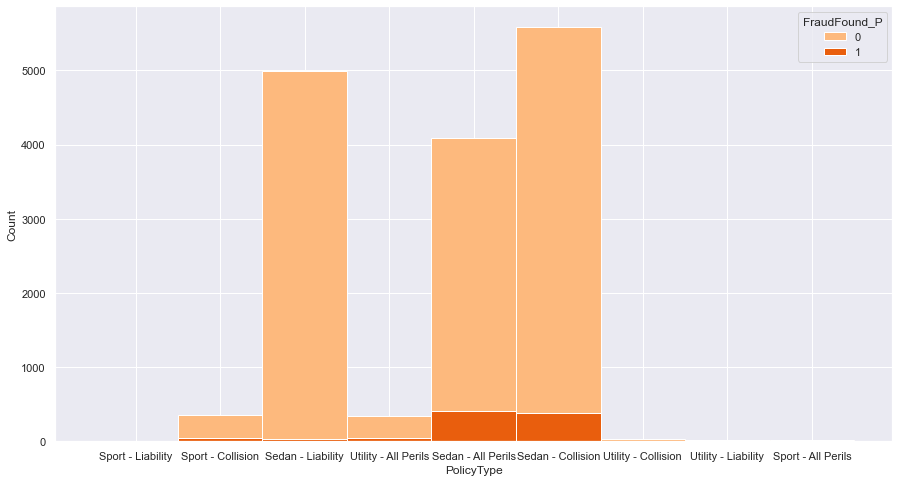

In [123]:
sns.histplot(df, hue = 'FraudFound_P', x = 'PolicyType', palette='Oranges', multiple = 'stack' , alpha = 1)

#### Policy type distribution across various years 

Text(0, 0.5, 'Year')

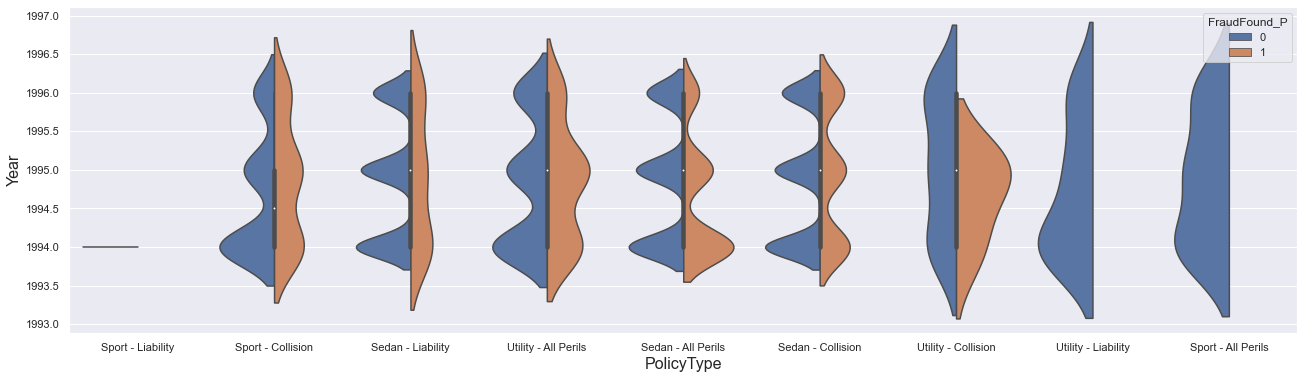

In [18]:
fig = plt.figure(figsize=(22, 6))
sns.violinplot(x="PolicyType",
               y="Year",
               data=df,
               hue="FraudFound_P",
               split=True,
               fontsize=16)
plt.xlabel("PolicyType", fontsize=16)
plt.ylabel("Year", fontsize=16)

#### Correlation 

In [10]:
df.corr()['FraudFound_P']

WeekOfMonthOfAccident   -0.01
WeekOfMonthClaimed      -0.01
AgeOfPolicyHolder       -0.02
FraudFound_P             1.00
PolicyNumber            -0.02
RepNumber               -0.01
Deductible               0.02
DriverRating             0.01
Year                    -0.02
Name: FraudFound_P, dtype: float64

<AxesSubplot:>

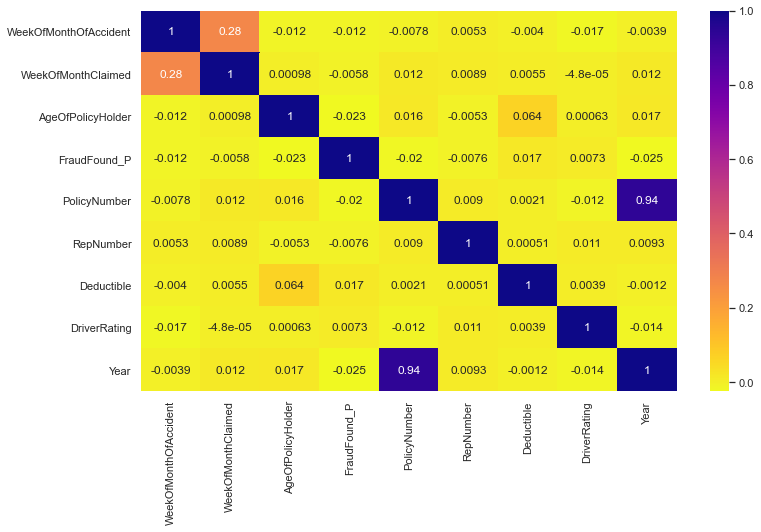

In [13]:
# Let's viualize the corr between independent variables and with dependant (target variable)
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, cmap="plasma_r")